Imports

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import sys
'Python: {sys.version}'
"LD_LIBRARY_PATH: {os.environ['LD_LIBRARY_PATH']}"
"PATH: {os.environ['PATH']}"

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

'Python: {sys.version}'

"LD_LIBRARY_PATH: {os.environ['LD_LIBRARY_PATH']}"

"PATH: {os.environ['PATH']}"

Carregando o dataset

In [4]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [5]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

60000

(60000, 28, 28)

(10000, 28, 28)

10000

0

9

Exibição dos dados

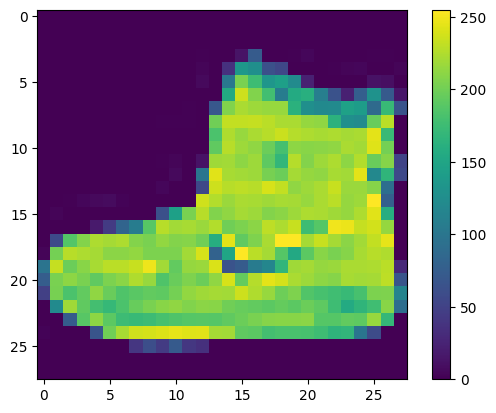

In [6]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [7]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [8]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

2024-03-23 15:34:09.308956: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-23 15:34:09.338393: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-23 15:34:09.338541: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

'lr\nlearning rate\ntaxa de aprendizado'

Epoch 1/5
  1/100 [..............................] - ETA: 1:17 - loss: 2.4054 - accuracy: 0.0833

2024-03-23 15:34:10.279205: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f45d3942dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-23 15:34:10.279223: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-03-23 15:34:10.282290: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-23 15:34:10.291072: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1711218850.331726   19432 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 [==============================] - 1s 2ms/step - loss: 0.7148 - accuracy: 0.7551 - val_loss: 0.4991 - val_accuracy: 0.8300
Epoch 2/5
100/100 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.8393 - val_loss: 0.4309 - val_accuracy: 0.8507
Epoch 3/5
  1/100 [..............................] - ETA: 0s - loss: 0.4280 - accuracy: 0.8375

/home/marcelo/des/estudo_data_science/.env/lib64/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.8544 - val_loss: 0.3969 - val_accuracy: 0.8600
Epoch 4/5
100/100 [==============================] - 0s 1ms/step - loss: 0.3855 - accuracy: 0.8645 - val_loss: 0.3746 - val_accuracy: 0.8672
Epoch 5/5
100/100 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8717 - val_loss: 0.3559 - val_accuracy: 0.8724


Sumário do modelo

In [9]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Pesos da primeira camada Dense

In [10]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.0046395 , -0.0832621 , -0.02332687, ..., -0.08933972,
         0.04238223,  0.01306757],
       [ 0.0093082 , -0.04954363,  0.08949916, ..., -0.0420681 ,
        -0.01743761, -0.06579952],
       [-0.00386622,  0.03406063,  0.01203041, ...,  0.04822056,
        -0.1166772 , -0.04087498],
       ...,
       [-0.03236126,  0.08031169,  0.01037014, ...,  0.01179581,
        -0.15176567, -0.00502265],
       [-0.04382467,  0.01812126,  0.03526295, ...,  0.03192185,
        -0.06432365,  0.00905284],
       [ 0.04439597, -0.01771348, -0.04273108, ..., -0.00930758,
         0.01920461, -0.04561971]], dtype=float32)

In [12]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].get_weights()


(784, 256)

'\nmodelo.layers[1].set_weights(\n    [pesos_camada_dense_zerados, vieses_camada_dense]\n)\n'

[array([[ 0.0046395 , -0.0832621 , -0.02332687, ..., -0.08933972,
          0.04238223,  0.01306757],
        [ 0.0093082 , -0.04954363,  0.08949916, ..., -0.0420681 ,
         -0.01743761, -0.06579952],
        [-0.00386622,  0.03406063,  0.01203041, ...,  0.04822056,
         -0.1166772 , -0.04087498],
        ...,
        [-0.03236126,  0.08031169,  0.01037014, ...,  0.01179581,
         -0.15176567, -0.00502265],
        [-0.04382467,  0.01812126,  0.03526295, ...,  0.03192185,
         -0.06432365,  0.00905284],
        [ 0.04439597, -0.01771348, -0.04273108, ..., -0.00930758,
          0.01920461, -0.04561971]], dtype=float32),
 array([-0.01233448,  0.0026759 , -0.05843303,  0.03334847,  0.12902689,
         0.12272828,  0.00149204,  0.03640196,  0.1555839 ,  0.02935342,
        -0.01145426, -0.03976372, -0.02172234,  0.04277096,  0.12173413,
         0.02798169,  0.09212197, -0.05047764,  0.04219839,  0.16112986,
        -0.00795763,  0.08701032, -0.04166219,  0.13354017,  0.069

In [13]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 2s 998us/step - loss: 0.4029 - accuracy: 0.8546 - val_loss: 0.4165 - val_accuracy: 0.8516
Epoch 2/5
1500/1500 [==============================] - 1s 923us/step - loss: 0.3651 - accuracy: 0.8650 - val_loss: 0.3570 - val_accuracy: 0.8708
Epoch 3/5
1500/1500 [==============================] - 1s 925us/step - loss: 0.3356 - accuracy: 0.8756 - val_loss: 0.3551 - val_accuracy: 0.8726
Epoch 4/5
1500/1500 [==============================] - 1s 919us/step - loss: 0.3268 - accuracy: 0.8778 - val_loss: 0.3352 - val_accuracy: 0.8769
Epoch 5/5
1500/1500 [==============================] - 1s 940us/step - loss: 0.3072 - accuracy: 0.8863 - val_loss: 0.3514 - val_accuracy: 0.8756


Text(0.5, 1.0, 'Acurácia por épocas')

Text(0.5, 0, 'épocas')

Text(0, 0.5, 'acurácia')

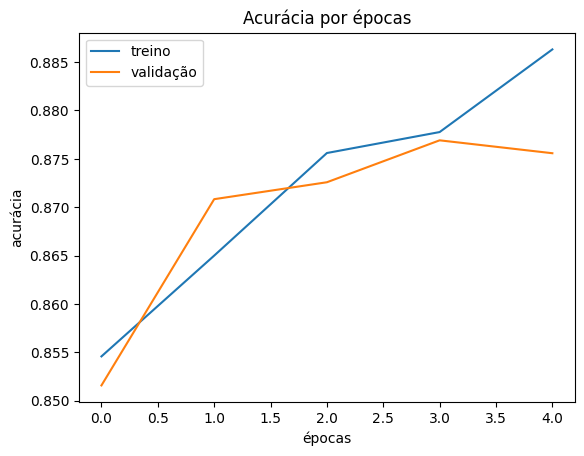

In [15]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Text(0.5, 1.0, 'Acurácia por épocas')

Text(0.5, 0, 'épocas')

Text(0, 0.5, 'acurácia')

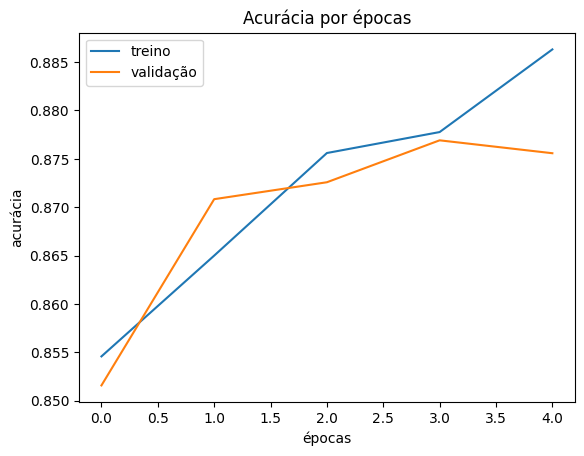

In [16]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [17]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Ze

Text(0.5, 1.0, 'Perda por épocas')

Text(0.5, 0, 'épocas')

Text(0, 0.5, 'perda')

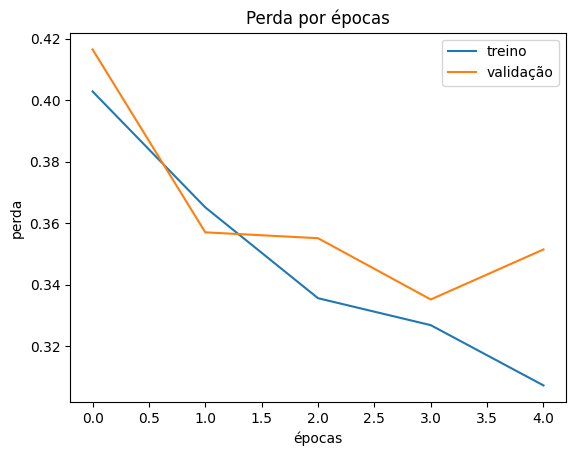

In [18]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [19]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [20]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

Salvando e carregando o modelo treinado

In [21]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

/home/marcelo/des/estudo_data_science/.env/lib64/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visualizando as acurácias de treino e validação por época

Text(0.5, 1.0, 'Acurácia por épocas')

Text(0.5, 0, 'épocas')

Text(0, 0.5, 'acurácia')

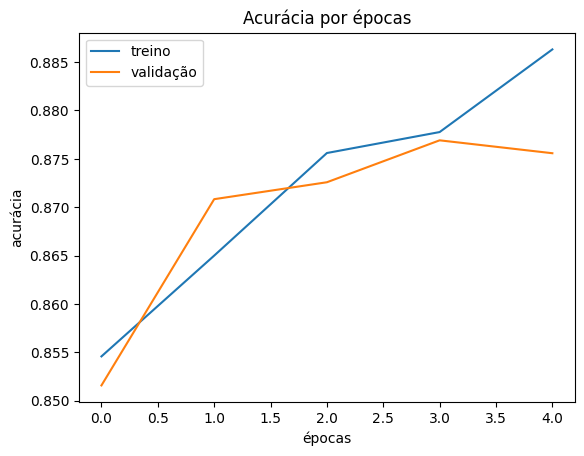

In [23]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

Text(0.5, 1.0, 'Perda por épocas')

Text(0.5, 0, 'épocas')

Text(0, 0.5, 'perda')

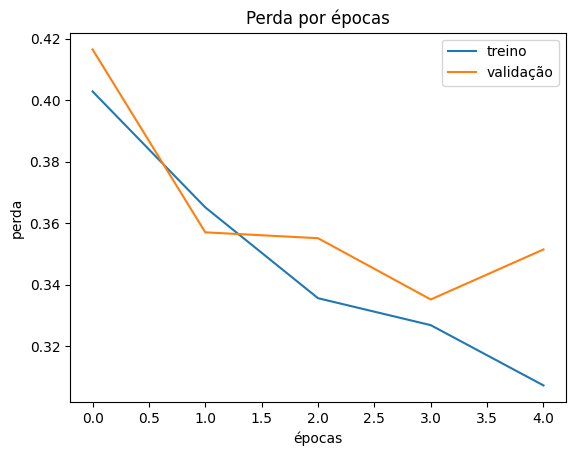

In [24]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [25]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 0s 471us/step
resultado teste: 5
número da imagem de teste: 2
313/313 [==============================] - 0s 469us/step
resultado teste modelo salvo: 5
número da imagem de teste: 2


Avaliando o modelo

In [26]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 0s 657us/step - loss: 330118.8750 - accuracy: 0.1000
Perda do teste: 330118.875
Acurácia do teste: 0.10000000149011612
